# ALUNOS: 

- Aluno1: Arthur de Barros Marcondes Machado Rosisca
- Aluno2: Vinicius Fonseca Navarro



# CI√äNCIA DE DADOS

## Etapas previstas para realizar An√°lise e Tratamento de Dados:
- Importar as bibliotecas necess√°rias 
- Importar a base de dado e realizar o merge, caso necess√°rio
- Tratamento dos Dados
- Visualiza√ß√£o dos dados
- Verificar a base estat√≠stica dos dados num√©ricos e n√£o num√©ricos
- Verificar as colunas categ√≥ricas
- An√°lise da base de dados
- Conclus√µes obtidas

## An√°lise de Perfil de risco de Benefici√°rios

O desafio consiste na **an√°lise de perfil de risco de benefici√°rios com predi√ß√£o, analise de custo evitado e alertas de poss√≠veis candidatos a doen√ßas cr√¥nicas**, segundo a Portaria n¬∫ 483, de 1¬∫ de abril de 2014, as doen√ßas cr√¥nicas s√£o aquelas que apresentam in√≠cio gradual, com dura√ß√£o longa ou incerta, que, em geral, apresentam m√∫ltiplas causas e cujo tratamento envolva mudan√ßas de estilo de vida, em um processo de cuidado cont√≠nuo. Segundo a OMS as principais doen√ßas cr√¥nicas n√£o transmiss√≠veis, (DCNT), um exemplo s√£o:
- Doen√ßas cerebrovasculares
- Doen√ßas cardiovasculares
- Diabetes mellitus
- Doen√ßas respirat√≥rias cr√¥nicas (asma)
- Neoplasias (c√¢ncer)
- Obesidade
- Hipertens√£o

Na Unimed Ponta Grossa, temos o programa de acompanhamento linha de cuidado, em que os benefici√°rios identificados com as DCNT s√£o acompanhados.

Para as an√°lises e ETLs ser√£o disponibilizadas informa√ß√µes referentes a utiliza√ß√£o do plano de sa√∫de por todos os benefici√°rios, procedimentos executados, dados do perfil de usu√°rio, entradas em pronto atendimento e interna√ß√£o (em uma base separada para ser relacionada por id de pessoa). Tamb√©m ser√£o indicados os pacientes que j√° possuem diagn√≥stico de DCNT e j√° s√£o acompanhados pela equipe de linha e cuidado e o tempo de acompanhamento. 

O **objetivo** √© construir um modelo capaz calcular o custo evitado dos pacientes que est√£o no programa, identificar pacientes com maior probabilidade de desenvolver DCTNs ou que j√° possam estar com alguma DCNTs e n√£o fazem parte da nossa linha de cuidado, com base em seus perfis e hist√≥ricos m√©dicos.

Resultados Esperados:
- Tratamento das informa√ß√µes
- Relacionamento entre o Datasets
- Identifica√ß√£o de padr√µes para cada grupo
- Alertas de poss√≠veis pacientes com DCNTs
- Predi√ß√£o de poss√≠veis casos:
- Resultado de custo Evitado (custo do paciente antes de entrar no programa e ap√≥s a entrada no programa)
- Predi√ß√£o de custo evitado de pacientes que ainda n√£o fazem parte do programa
B√¥nus: outras analises n√£o indicadas acima
**Obs: na analise de custo evitado, levar em conta a corre√ß√£o monet√°ria dos anos anteriores
 
Dados Gerais
- ID de usu√°rio
- Data de nascimento
- Sexo
- Peso
- N√∫mero de Gesta√ß√µes
- Grau de depend√™ncia (Se Titular)
- Contratante
- Tipo de Plano
- Procedimentos Realizados
- Data do procedimento
- Especialidade do executante
- Especialidade do solicitante
- Paciente faz parte da linha de cuidado
- Programa que o paciente faz parte

Dados de PA e Interna√ß√£o (somente Benefici√°rios):
- ID do atendimento
- Data/hora da entrada
- Procedimento principal do atendimento
- CID
- Queixa
- Observa√ß√£o
- Cl√≠nica (tipo de atendimento)
- Especialidade M√©dico Respons√°vel
- Classifica√ß√£o de Risco (Manchester)
- Data/hora da Interna√ß√£o
- Motivo da Alta
- Data da alta

## Importar as bibliotecas necess√°rias e a base de dados. Realizar o merge, caso necess√°rio e Realizar a visualiza√ß√£o da mesma 

In [3]:
# Importar as bibliotecas
import pandas as pd
import numpy as np 
import os
from datetime import datetime
diretorio_atual = os.getcwd()
print(f"O Jupyter est√° rodando a partir de: {diretorio_atual}")

O Jupyter est√° rodando a partir de: /home/arthur/Documents/FACULDADE/TOPICOS EM PROGRAMACAO 2/trabBrowser


### Importar a base de dados

In [4]:
print("=== INICIANDO CARREGAMENTO DOS DADOS ===")
path_hospital = 'Dados/Hospital/'
path_linha_cuidado = 'Dados/Linha de cuidado/'
path_plano_saude = 'Dados/Plano de Sa√∫de/'
path_geral = 'Dados/'

arquivos_a_carregar = {
    'df_atend_hgu_cid': path_hospital + 'atendimento_hgu_cid.xlsx',
    'df_atend_hgu': path_hospital + 'atendimento_hgu.xlsx',
    'df_paciente_hgu': path_hospital + 'paciente_hgu.xlsx',
    'df_proc_atend_hgu': path_hospital + 'procedimento_atendimento_hgu.xlsx',
    'df_cid_linha_cuidado': path_linha_cuidado + 'cid_linha_cuidado.xlsx',
    'df_proc_linha_cuidado': path_linha_cuidado + 'procedimento_linha_cuidado.xlsx',
    'df_benef_proc_plano': path_plano_saude + 'beneficiario_custo_procedimento_plano_de_saude.xlsx',
    'df_beneficiarios_plano': path_plano_saude + 'beneficiarios.xlsx',
    'df_procedimento_geral': path_geral + 'procedimento.xlsx'
}
dataframes = {}
for nome, caminho in arquivos_a_carregar.items():
    try:
        dataframes[nome] = pd.read_excel(caminho)
        print(f"‚úì Arquivo '{caminho}' carregado com sucesso como '{nome}'.")
    except FileNotFoundError:
        print(f"‚úó ERRO: Arquivo n√£o encontrado em '{caminho}'.")
        exit()
    except Exception as e:
        print(f"‚úó ERRO ao carregar '{caminho}': {e}")
        exit()
print("\n=== DADOS CARREGADOS COM SUCESSO ===\n")

=== INICIANDO CARREGAMENTO DOS DADOS ===
‚úì Arquivo 'Dados/Hospital/atendimento_hgu_cid.xlsx' carregado com sucesso como 'df_atend_hgu_cid'.
‚úì Arquivo 'Dados/Hospital/atendimento_hgu.xlsx' carregado com sucesso como 'df_atend_hgu'.
‚úì Arquivo 'Dados/Hospital/paciente_hgu.xlsx' carregado com sucesso como 'df_paciente_hgu'.
‚úì Arquivo 'Dados/Hospital/procedimento_atendimento_hgu.xlsx' carregado com sucesso como 'df_proc_atend_hgu'.
‚úì Arquivo 'Dados/Linha de cuidado/cid_linha_cuidado.xlsx' carregado com sucesso como 'df_cid_linha_cuidado'.
‚úì Arquivo 'Dados/Linha de cuidado/procedimento_linha_cuidado.xlsx' carregado com sucesso como 'df_proc_linha_cuidado'.
‚úì Arquivo 'Dados/Plano de Sa√∫de/beneficiario_custo_procedimento_plano_de_saude.xlsx' carregado com sucesso como 'df_benef_proc_plano'.
‚úì Arquivo 'Dados/Plano de Sa√∫de/beneficiarios.xlsx' carregado com sucesso como 'df_beneficiarios_plano'.
‚úì Arquivo 'Dados/procedimento.xlsx' carregado com sucesso como 'df_procedimento_g

### Limpeza e pr√©-processamento dos dados

## Corre√ß√£o de tipos de dados

In [5]:
print("=== INICIANDO LIMPEZA E PR√â-PROCESSAMENTO ===")
# 1. Corre√ß√£o de Tipos de Dados (Datas)
dataframes['df_atend_hgu_cid']['dt_diagnostico'] = pd.to_datetime(dataframes['df_atend_hgu_cid']['dt_diagnostico'], errors='coerce')
dataframes['df_atend_hgu']['dt_entrada'] = pd.to_datetime(dataframes['df_atend_hgu']['dt_entrada'], errors='coerce')
dataframes['df_atend_hgu']['dt_alta'] = pd.to_datetime(dataframes['df_atend_hgu']['dt_alta'], errors='coerce')
dataframes['df_paciente_hgu']['dt_nascimento'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_nascimento'], errors='coerce')
dataframes['df_paciente_hgu']['dt_obito'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_obito'], errors='coerce')
dataframes['df_proc_atend_hgu']['dt_item'] = pd.to_datetime(dataframes['df_proc_atend_hgu']['dt_item'], errors='coerce')
dataframes['df_benef_proc_plano']['dt_item'] = pd.to_datetime(dataframes['df_benef_proc_plano']['dt_item'], errors='coerce')
print("=== PROCESSO CONCLUIDO ===")

=== INICIANDO LIMPEZA E PR√â-PROCESSAMENTO ===


/tmp/ipykernel_27809/3007726937.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframes['df_paciente_hgu']['dt_obito'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_obito'], errors='coerce')


=== PROCESSO CONCLUIDO ===


## Remover colunas com excesso de nulos

In [6]:
# 2. Remover Colunas com Excesso de Nulos
dataframes['df_atend_hgu'] = dataframes['df_atend_hgu'].drop(columns=['ds_triagem', 'ds_queixa'])
dataframes['df_benef_proc_plano'] = dataframes['df_benef_proc_plano'].drop(columns=['ds_especialidade_executor'])

## Substituir valores sentinela e corrigir outliers

In [7]:
# 3. Substituir Valores Sentinela e Corrigir Outliers
for col in ['qt_imc', 'qt_altura_cm', 'qt_peso']:
    dataframes['df_paciente_hgu'][col] = dataframes['df_paciente_hgu'][col].replace(-1.0, np.nan)
dataframes['df_paciente_hgu'].loc[dataframes['df_paciente_hgu']['qt_altura_cm'] > 250, 'qt_altura_cm'] = np.nan
dataframes['df_proc_atend_hgu'].loc[dataframes['df_proc_atend_hgu']['qt_item'] < 0, 'qt_item'] = np.nan
print("‚úì Processo de limpeza conclu√≠do.")
print("\n=== LIMPEZA CONCLU√çDA ===\n")

‚úì Processo de limpeza conclu√≠do.

=== LIMPEZA CONCLU√çDA ===



### Unifica√ß√£o dos dados

In [8]:
print("=== INICIANDO UNIFICA√á√ÉO DOS DADOS ===")

# 1. Agregar dados do plano de sa√∫de por benefici√°rio
print("\n--- 1. Agregando dados do plano de sa√∫de...")
df_plano_agg = dataframes['df_benef_proc_plano'].groupby('id_beneficiario').agg(
    total_custo_plano=('vl_item', 'sum'),
    num_procedimentos_plano=('id_item', 'count')
).reset_index()
print("‚úì Dados do plano agregados.")

# 2. Agregar dados de atendimento hospitalar por paciente
print("\n--- 2. Agregando dados de atendimento hospitalar...")
df_hospital_agg = dataframes['df_atend_hgu'].groupby('id_paciente').agg(
    num_atendimentos_hosp=('nr_atendimento', 'nunique'), # nunique para contar atendimentos √∫nicos
    tempo_total_internacao_dias=('dt_alta', lambda x: (x.max() - x.min()).days)
).reset_index()
print("‚úì Dados hospitalares agregados.")

=== INICIANDO UNIFICA√á√ÉO DOS DADOS ===

--- 1. Agregando dados do plano de sa√∫de...
‚úì Dados do plano agregados.

--- 2. Agregando dados de atendimento hospitalar...
‚úì Dados hospitalares agregados.


## Descartas as duplicadas do merge

In [9]:
# 3. Preparar a tabela de pacientes para o merge
# A tabela df_paciente_hgu √© a nossa "ponte" entre o id_beneficiario e o id_paciente
# Descartas as duplicadas
df_pacientes = dataframes['df_paciente_hgu'][['id_beneficiario', 'id_paciente', 'dt_nascimento', 'cd_sexo']].drop_duplicates()

### Construir a Tabela Master

In [10]:
# 4. Construir a Tabela Master
print("\n--- 3. Construindo a tabela master (df_master)...")
# Come√ßamos com a lista de todos os benefici√°rios
df_master = dataframes['df_beneficiarios_plano']

# Merge com os dados dos pacientes (para pegar id_paciente, dt_nascimento, etc)
# Usamos 'left' para manter todos os benefici√°rios, mesmo que n√£o tenham dados de paciente no HGU
df_master = pd.merge(df_master, df_pacientes, on='id_beneficiario', how='left')
print("... merged com dados de pacientes")

# Merge com os dados agregados do plano
df_master = pd.merge(df_master, df_plano_agg, on='id_beneficiario', how='left')
print("... merged com dados agregados do plano")

# Merge com os dados agregados do hospital (usando a 'ponte' id_paciente)
df_master = pd.merge(df_master, df_hospital_agg, on='id_paciente', how='left')
print("... merged com dados agregados do hospital")
print("‚úì Tabela Master criada com sucesso!")


--- 3. Construindo a tabela master (df_master)...
... merged com dados de pacientes
... merged com dados agregados do plano
... merged com dados agregados do hospital
‚úì Tabela Master criada com sucesso!


### Engenharia de Features e tratamento de dados

In [11]:
# 5. Engenharia de Features Adicional
print("\n--- 4. Realizando engenharia de features adicional...")
# Calcular a idade a partir da data de nascimento
# Usamos uma data de refer√™ncia para o c√°lculo, por exemplo, a data de hoje.
data_referencia = datetime.now()
df_master['idade_calculada'] = (data_referencia - df_master['dt_nascimento']).dt.days / 365.25


--- 4. Realizando engenharia de features adicional...


## Preencher valores nulos que surgiram nos merges (pacientes sem custos ou atendimentos)

In [12]:
# Preencher valores nulos que surgiram nos merges (pacientes sem custos ou atendimentos)
df_master['total_custo_plano'] = df_master['total_custo_plano'].fillna(0)
df_master['num_procedimentos_plano'] = df_master['num_procedimentos_plano'].fillna(0)
df_master['num_atendimentos_hosp'] = df_master['num_atendimentos_hosp'].fillna(0)
print("‚úì Novas features criadas e valores nulos tratados.")

‚úì Novas features criadas e valores nulos tratados.


In [13]:
# 6. Salvar o resultado final
print("\n--- 5. Salvando a tabela master...")
output_path = 'Resultados/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

final_csv_path = os.path.join(output_path, 'master_beneficiarios.csv')
df_master.to_csv(final_csv_path, index=False, sep=';', decimal=',')
print("‚úì Tabela Master salva com sucesso em: {final_csv_path}")


--- 5. Salvando a tabela master...
‚úì Tabela Master salva com sucesso em: {final_csv_path}


In [14]:
# Visualizar a base de dados
print("\n--- Amostra da Tabela Master Final ---")
print(df_master.head())
print("\n--- Informa√ß√µes da Tabela Master Final ---")
df_master.info()

print("\n=== PROCESSO CONCLU√çDO ===")


--- Amostra da Tabela Master Final ---
   id_beneficiario  nr_contrato  id_plano               ds_plano  \
0           143274     15796120        10  FAMILIAR - REFER√äNCIA   
1           138347      4259520        10  FAMILIAR - REFER√äNCIA   
2           140363      8823420        10  FAMILIAR - REFER√äNCIA   
3           143358     16054720        10  FAMILIAR - REFER√äNCIA   
4           168425     38214020        10  FAMILIAR - REFER√äNCIA   

  ds_formacao_preco  id_familia  qt_idade    ds_sexo ds_estado_civil  \
0  Pr√©-estabelecido       55250      54.0   Feminino        Solteiro   
1  Pr√©-estabelecido       21906      57.0   Feminino          Casado   
2  Pr√©-estabelecido       34830      61.0   Feminino          Casado   
3  Pr√©-estabelecido       55739      47.0   Feminino          Casado   
4  Pr√©-estabelecido      137215      13.0  Masculino        Solteiro   

  ds_parentesco  id_paciente dt_nascimento cd_sexo  total_custo_plano  \
0       Titular     666333.0    197

## Tratamento dos dados: verificar e corrigir o dom√≠nios dos campos, se h√° dados faltantes, verificar cardinalidade, identificar colunas categ√≥ricas, de visualizar as informa√ß√µes estat√≠sticas da base (dados num√©ricos e n√£o num√©ricos)

### Importa√ß√£o das Bibliotecas de Modelagem


In [15]:
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Resumo das bases

In [16]:
# Resumo das bases
print("=== RESUMO DAS BASES DE DADOS ===")
for nome, df in dataframes.items():
    print(f"\n{nome}:")
    print(f"Shape: {df.shape}")
    print(f"Colunas: {df.columns.tolist()}")
    print(f"Tipos de dados:\n{df.dtypes}")
    print(f"Valores nulos:\n{df.isnull().sum()}")

=== RESUMO DAS BASES DE DADOS ===

df_atend_hgu_cid:
Shape: (11031, 6)
Colunas: ['nr_atendimento', 'cd_doenca', 'dt_diagnostico', 'ds_classificacao_diagnostico', 'ds_linha_cuidado', 'id_linha_cuidado']
Tipos de dados:
nr_atendimento                           int64
cd_doenca                               object
dt_diagnostico                  datetime64[ns]
ds_classificacao_diagnostico            object
ds_linha_cuidado                        object
id_linha_cuidado                         int64
dtype: object
Valores nulos:
nr_atendimento                  0
cd_doenca                       0
dt_diagnostico                  0
ds_classificacao_diagnostico    0
ds_linha_cuidado                0
id_linha_cuidado                0
dtype: int64

df_atend_hgu:
Shape: (712891, 9)
Colunas: ['nr_atendimento', 'cd_estabelecimento', 'id_paciente', 'dt_entrada', 'dt_alta', 'ds_especialidade_medico_responsavel', 'ds_motivo_alta', 'ds_tipo_atendimento', 'ds_clinica']
Tipos de dados:
nr_atendimento      

### Iniciando etapa de modelagem

In [17]:
print("=== INICIANDO ETAPA DE MODELAGEM: CRIA√á√ÉO DE PERFIS DE RISCO ===")

# --- 1. Carregar os Dados Limpos ---
# Carregamos diretamente o arquivo CSV mestre que foi gerado no script anterior.
input_file = 'Resultados/master_beneficiarios.csv'
try:
    df_master = pd.read_csv(input_file, sep=';', decimal=',')
    print(f"‚úì Arquivo mestre '{input_file}' carregado com sucesso.")
except FileNotFoundError:
    print(f"‚úó ERRO: Arquivo '{input_file}' n√£o encontrado. Execute o script de prepara√ß√£o de dados primeiro.")
    exit()


=== INICIANDO ETAPA DE MODELAGEM: CRIA√á√ÉO DE PERFIS DE RISCO ===
‚úì Arquivo mestre 'Resultados/master_beneficiarios.csv' carregado com sucesso.


### Dom√≠nios incorretos, caso existam

In [18]:
# Verificar dom√≠nios incorretos
print("=== VERIFICA√á√ÉO DE DOM√çNIOS ===")

# Verificar valores √∫nicos em colunas categ√≥ricas
colunas_categoricas = ['ds_sexo', 'ds_estado_civil', 'ds_parentesco', 'ds_plano', 'ds_formacao_preco']
for col in colunas_categoricas:
    if col in df_master.columns:
        print(f"\nValores √∫nicos em {col}:")
        print(df_master[col].value_counts())

=== VERIFICA√á√ÉO DE DOM√çNIOS ===

Valores √∫nicos em ds_sexo:
ds_sexo
Masculino    56593
Feminino     56038
Name: count, dtype: int64

Valores √∫nicos em ds_estado_civil:
ds_estado_civil
Solteiro                     64791
Casado                       40885
Concubinato/Uni√£o Est√°vel     4497
Divorciado                    1051
Vi√∫vo                          842
Outros                         272
Separado                       266
Desquitado                       8
Name: count, dtype: int64

Valores √∫nicos em ds_parentesco:
ds_parentesco
Titular                56331
Filho (a)              30316
C√¥njuge                20199
Filho (a) estudante     2931
Companheiro (a)         1408
Enteado (a)              416
Outros Dependentes       332
Filho (a) PNE            221
Pai                      192
Filho (a) adotivo        137
Neto (a)                  61
Irm√£o                     41
Sogro (a)                 34
Nora                      13
Agregados                  5
Irm√£           

### Tratamento das colunas categ√≥ricas

In [19]:
# --- 2. Prepara√ß√£o dos Dados para o Modelo (Pr√©-processamento) ---
print("\n--- 2. Preparando dados para o modelo...")

# Selecionar as 'features' (caracter√≠sticas) que usaremos para criar os clusters.
# Exclu√≠mos IDs e colunas de texto que n√£o ser√£o usadas diretamente.
features_numericas = [
    'qt_idade', 
    'idade_calculada',
    'total_custo_plano', 
    'num_procedimentos_plano', 
    'num_atendimentos_hosp'
]
features_categoricas = [
    'ds_sexo', 
    'ds_estado_civil',
    'ds_parentesco'
]


--- 2. Preparando dados para o modelo...


### Tratamento dos valores nulos, caso existam


In [20]:
# Lidar com valores nulos restantes. Para simplicidade, preenchemos com a mediana ou a moda.
for col in features_numericas:
    if df_master[col].isnull().any():
        mediana = df_master[col].median()
        df_master[col] = df_master[col].fillna(mediana)

for col in features_categoricas:
    if df_master[col].isnull().any():
        moda = df_master[col].mode()[0]
        df_master[col].fillna(moda, inplace=True)

/tmp/ipykernel_27809/2670115440.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master[col].fillna(moda, inplace=True)


### Cardinalidade dos dados

In [21]:
# Verificar cardinalidade
print("=== VERIFICA√á√ÉO DE CARDINALIDADE ===")

# Calcular cardinalidade para cada coluna
for col in df_master.columns:
    cardinalidade = df_master[col].nunique()
    print(f"{col}: {cardinalidade} valores √∫nicos")

=== VERIFICA√á√ÉO DE CARDINALIDADE ===
id_beneficiario: 112646 valores √∫nicos
nr_contrato: 14633 valores √∫nicos
id_plano: 264 valores √∫nicos
ds_plano: 124 valores √∫nicos
ds_formacao_preco: 2 valores √∫nicos
id_familia: 56346 valores √∫nicos
qt_idade: 105 valores √∫nicos
ds_sexo: 2 valores √∫nicos
ds_estado_civil: 8 valores √∫nicos
ds_parentesco: 19 valores √∫nicos
id_paciente: 74376 valores √∫nicos
dt_nascimento: 25485 valores √∫nicos
cd_sexo: 2 valores √∫nicos
total_custo_plano: 21749 valores √∫nicos
num_procedimentos_plano: 188 valores √∫nicos
num_atendimentos_hosp: 88 valores √∫nicos
tempo_total_internacao_dias: 855 valores √∫nicos
idade_calculada: 25485 valores √∫nicos


### Tratamento dos valores duplicados, caso existam

In [22]:
# Verificar e tratar duplicados
print("=== VERIFICA√á√ÉO DE DUPLICADOS ===")

# Verificar duplicados antes
print("\nQuantidade de linhas duplicadas antes:", df_master.duplicated().sum())

# Remover duplicados
df_master = df_master.drop_duplicates()

# Verificar duplicados depois
print("Quantidade de linhas duplicadas depois:", df_master.duplicated().sum())

=== VERIFICA√á√ÉO DE DUPLICADOS ===

Quantidade de linhas duplicadas antes: 0
Quantidade de linhas duplicadas depois: 0


### Excluir linhas e colunas desnecess√°rias

In [23]:
## feita em etapa anterior

### Verificando informa√ß√µes estat√≠sticas da base

In [24]:
# Para dados num√©ricos
print("=== INFORMA√á√ïES ESTAT√çSTICAS - DADOS NUM√âRICOS ===")
colunas_numericas = ['idade_calculada', 'total_custo_plano', 'num_procedimentos_plano', 
                     'num_atendimentos_hosp', 'tempo_total_internacao_dias']
print(df_master[colunas_numericas].describe())

=== INFORMA√á√ïES ESTAT√çSTICAS - DADOS NUM√âRICOS ===
       idade_calculada  total_custo_plano  num_procedimentos_plano  \
count    112646.000000      112646.000000             112646.00000   
mean         34.276184         284.233603                  3.82801   
std          16.090732        2194.519783                 12.68893   
min           0.123203           0.000000                  0.00000   
25%          28.109514           0.000000                  0.00000   
50%          34.146475           0.000000                  0.00000   
75%          40.060233         125.000000                  1.00000   
max         103.192334      350069.580000               1603.00000   

       num_atendimentos_hosp  tempo_total_internacao_dias  
count          112646.000000                 64959.000000  
mean                3.571880                   348.495974  
std                 5.908857                   283.892301  
min                 0.000000                     0.000000  
25%           

In [25]:
# Para dados n√£o num√©ricos
print("\n=== INFORMA√á√ïES ESTAT√çSTICAS - DADOS CATEG√ìRICOS ===")
for col in colunas_categoricas:
    print(f"\nDistribui√ß√£o de {col}:")
    print(df_master[col].value_counts(normalize=True).head())


=== INFORMA√á√ïES ESTAT√çSTICAS - DADOS CATEG√ìRICOS ===

Distribui√ß√£o de ds_sexo:
ds_sexo
Masculino    0.50253
Feminino     0.49747
Name: proportion, dtype: float64

Distribui√ß√£o de ds_estado_civil:
ds_estado_civil
Solteiro                     0.575475
Casado                       0.362951
Concubinato/Uni√£o Est√°vel    0.039922
Divorciado                   0.009330
Vi√∫vo                        0.007475
Name: proportion, dtype: float64

Distribui√ß√£o de ds_parentesco:
ds_parentesco
Titular                0.500071
Filho (a)              0.269126
C√¥njuge                0.179314
Filho (a) estudante    0.026020
Companheiro (a)        0.012499
Name: proportion, dtype: float64

Distribui√ß√£o de ds_plano:
ds_plano
COLETIVO EMPRESARIAL-UNIFAMILIA                           0.166033
COLETIVO EMPRESARIAL NACIONAL ENFERMARIA 30-20            0.159260
Coletivo Empresarial Municipal Rede Propria Enfermaria    0.087131
Coletivo Empresarial Regional Rede Propria Enfermaria     0.081459
COLET

### An√°lise da base

## Criar um 'pipeline' de pr√©-processamento

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)
    ],
    remainder='passthrough' # Mant√©m outras colunas, se houver
)

# Aplicar o pr√©-processamento
X = df_master[features_numericas + features_categoricas]
X_processed = preprocessor.fit_transform(X)
print("‚úì Dados pr√©-processados e prontos para o modelo.")

‚úì Dados pr√©-processados e prontos para o modelo.


## Encontrar o N√∫mero Ideal de Clusters (M√©todo do Cotovelo)


--- Encontrando o n√∫mero ideal de clusters (K)...
‚úì Gr√°fico do 'M√©todo do Cotovelo' salvo em: Resultados/metodo_cotovelo.png


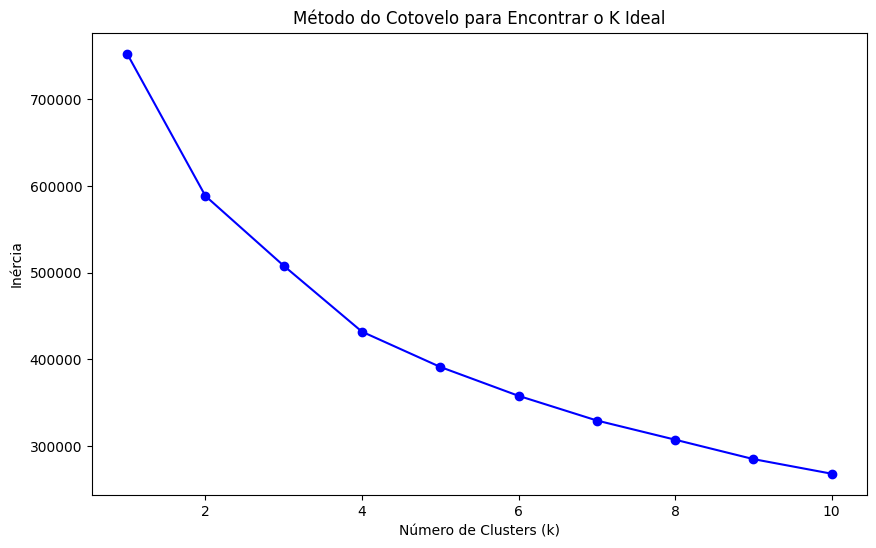

In [27]:
print("\n--- Encontrando o n√∫mero ideal de clusters (K)...")
inertia = []
K_range = range(1, 11) # Testaremos de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plotar o gr√°fico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('In√©rcia')
plt.title('M√©todo do Cotovelo para Encontrar o K Ideal')
elbow_path = 'Resultados/metodo_cotovelo.png'
plt.savefig(elbow_path)
print(f"‚úì Gr√°fico do 'M√©todo do Cotovelo' salvo em: {elbow_path}")

## Treinar o Modelo K-Means e Criar os Perfis

In [28]:
K_ideal = 4  # Baseado no gr√°fico do cotovelo
print(f"\n--- Treinando o modelo K-Means com K={K_ideal}...")
kmeans_final = KMeans(n_clusters=K_ideal, random_state=42, n_init=10)
kmeans_final.fit(X_processed)

# Adicionar os r√≥tulos dos clusters de volta ao DataFrame original
df_master['perfil_risco'] = kmeans_final.labels_
print("‚úì Modelo treinado e perfis de risco atribu√≠dos a cada benefici√°rio.")


--- Treinando o modelo K-Means com K=4...
‚úì Modelo treinado e perfis de risco atribu√≠dos a cada benefici√°rio.


‚úì Modelo treinado e perfis de risco atribu√≠dos a cada benefici√°rio.


## An√°lise e Interpreta√ß√£o dos Perfis

In [29]:
print(f"\n--- An√°lise dos {K_ideal} Perfis de Risco Criados ---")

# Agrupar por perfil e calcular a m√©dia das caracter√≠sticas mais importantes
analise_perfis = df_master.groupby('perfil_risco')[features_numericas].mean().round(2)

# Adicionar a contagem de membros em cada perfil
analise_perfis['num_beneficiarios'] = df_master['perfil_risco'].value_counts()

print("Caracter√≠sticas m√©dias de cada perfil:")
print(analise_perfis)


--- An√°lise dos 4 Perfis de Risco Criados ---
Caracter√≠sticas m√©dias de cada perfil:
              qt_idade  idade_calculada  total_custo_plano  \
perfil_risco                                                 
0                39.04            37.89              77.97   
1                11.55            20.42             136.25   
2                38.47            39.37          130910.04   
3                55.82            56.34            1357.08   

              num_procedimentos_plano  num_atendimentos_hosp  \
perfil_risco                                                   
0                                1.12                   1.94   
1                                2.00                   2.93   
2                              420.24                  15.29   
3                               19.13                  11.86   

              num_beneficiarios  
perfil_risco                     
0                         59162  
1                         38809  
2                

## Salvar a tabela de an√°lise e a tabela mestre com os perfis

In [30]:
analise_path = 'Resultados/analise_perfis_risco.csv'
final_com_perfis_path = 'Resultados/master_com_perfis.csv'

analise_perfis.to_csv(analise_path, sep=';', decimal=',')
df_master.to_csv(final_com_perfis_path, index=False, sep=';', decimal=',')

print(f"\n‚úì An√°lise dos perfis salva em: {analise_path}")
print(f"‚úì Tabela final com os perfis salva em: {final_com_perfis_path}")
print("\n=== MODELAGEM CONCLU√çDA ===")


‚úì An√°lise dos perfis salva em: Resultados/analise_perfis_risco.csv
‚úì Tabela final com os perfis salva em: Resultados/master_com_perfis.csv

=== MODELAGEM CONCLU√çDA ===


### Conclus√µes obtidas

Perfil 0: "A Popula√ß√£o Geral"
Caracter√≠sticas: Este √© o maior grupo, com idade m√©dia de 38 anos. O uso do plano √© m√≠nimo, com o menor custo m√©dio de todos os grupos.
Conclus√£o do Perfil: Este grupo representa a "massa" de benefici√°rios adultos que s√£o, em sua maioria, saud√°veis e utilizam o plano de forma espor√°dica. Este √© um perfil de risco baixo a moderado, que deve ser monitorado para a√ß√µes de preven√ß√£o prim√°ria.

Perfil 1: "Jovens e Dependentes de Baixo Uso" 
Caracter√≠sticas: √â o grupo mais jovem (idade m√©dia de 20 anos), com custos, procedimentos e atendimentos muito baixos. √â o segundo maior grupo.
Conclus√£o do Perfil: Representa a popula√ß√£o de dependentes (filhos), que s√£o geralmente saud√°veis e usam o plano para consultas e procedimentos de rotina ou de baixa complexidade. Este √© um perfil de risco baixo.


Perfil 2: "Cr√≠ticos de Alt√≠ssimo Custo" üöë
Caracter√≠sticas: Um grupo muito pequeno (apenas 17 pessoas), mas com um impacto financeiro gigantesco. A idade √© de 39 anos, mas o custo m√©dio √© astron√¥mico (mais de R$ 130 mil), com uma quantidade massiva de procedimentos (420) e atendimentos.
Conclus√£o do Perfil: Este perfil representa os outliers de custo, os casos mais complexos e caros. Podem ser pacientes com c√¢ncer, em longas interna√ß√µes em UTI, ou que passaram por cirurgias de alta complexidade. Embora sejam poucos, consomem uma parcela desproporcional dos recursos. Este √© um perfil de risco cr√≠tico, que necessita de gest√£o de caso intensiva e individualizada.

Perfil 3: "Cr√¥nicos com Uso Frequente" ü©∫
Caracter√≠sticas: Este √© o grupo mais velho (idade m√©dia de 56 anos). Embora o custo m√©dio (R$ 1.357) n√£o seja o mais alto, eles s√£o usu√°rios frequentes do sistema: t√™m um n√∫mero elevado de procedimentos (19) e atendimentos hospitalares (12).
Conclus√£o do Perfil: Este √© o perfil-alvo principal para os programas de "Linhas de Cuidado" da Unimed. S√£o pacientes com doen√ßas cr√¥nicas que necessitam de acompanhamento constante para evitar agudiza√ß√µes. O foco aqui √© a gest√£o da sa√∫de para prevenir que se tornem pacientes do Perfil 2. Este √© um perfil de risco alto e gerenci√°vel.

Gerando o Dashboard Principal de An√°lise de Perfis...


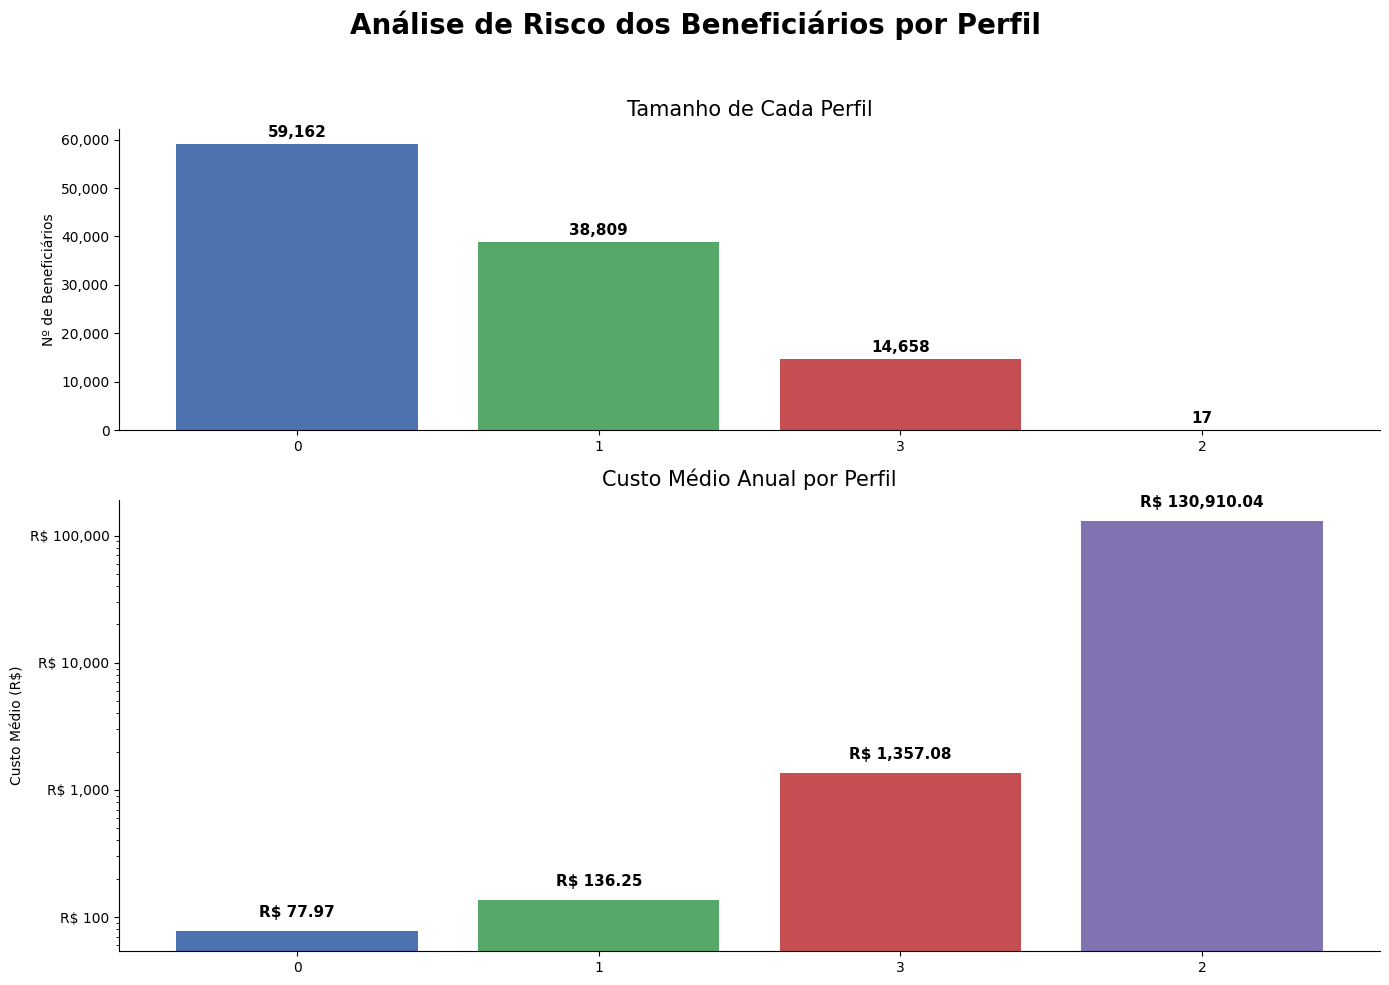

In [31]:
# Dashboard 1: An√°lise Completa dos Perfis de Risco
print("Gerando o Dashboard Principal de An√°lise de Perfis...")

# Preparar os dados para o dashboard
perfil_counts = df_master['perfil_risco'].value_counts()
custo_por_perfil = df_master.groupby('perfil_risco')['total_custo_plano'].mean()
df_analise = pd.DataFrame({
    'num_beneficiarios': perfil_counts,
    'custo_medio': custo_por_perfil
}).sort_values(by='num_beneficiarios', ascending=False)


# Criar a figura com 2 subplots (um em cima do outro)
fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(14, 10),
    gridspec_kw={'height_ratios': [1, 1.5]} # O gr√°fico de baixo √© maior
)
fig.suptitle('An√°lise de Risco dos Benefici√°rios por Perfil', fontsize=20, weight='bold')


# ======================================================
# Gr√°fico 1 (Superior): Quantidade por Perfil
# ======================================================
ax[0].bar(
    df_analise.index.astype(str),
    df_analise['num_beneficiarios'],
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'] # Paleta de cores customizada
)

# Anota√ß√µes e customiza√ß√£o do Gr√°fico 1
ax[0].set_title('Tamanho de Cada Perfil', fontsize=15, pad=10)
ax[0].set_ylabel('N¬∫ de Benefici√°rios')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].bar_label(ax[0].containers[0], fmt='{:,.0f}', fontsize=11, weight='bold', padding=3)


# ======================================================
# Gr√°fico 2 (Inferior): Custo M√©dio por Perfil
# ======================================================
ax[1].bar(
    df_analise.index.astype(str),
    df_analise['custo_medio'],
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2']
)

# Anota√ß√µes e customiza√ß√£o do Gr√°fico 2
ax[1].set_title('Custo M√©dio Anual por Perfil', fontsize=15, pad=10)
ax[1].set_ylabel('Custo M√©dio (R$)')
ax[1].set_yscale('log') # Escala log √© essencial aqui
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {int(x):,}'))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Anota√ß√£o customizada para os valores de custo
for i, (valor, perfil_idx) in enumerate(zip(df_analise['custo_medio'], df_analise.index)):
    ax[1].annotate(f'R$ {valor:,.2f}',
                   (i, valor),
                   ha="center",
                   xytext=(0, 10),
                   textcoords="offset points",
                   fontsize=11,
                   fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para o supert√≠tulo
plt.show()

# Matplotlib

Preparar visualiza√ß√µes das principais informa√ß√µes obtidas na base de dados apresentada pela UNIMED, como, por exemplo:
### - Evolu√ß√£o do n√∫mero de benefici√°rios dos √∫ltimos anos 
### - Quantidade de benefici√°rios nos √∫ltimos anos que apresentam pelo menos uma DCNT e um segundo gr√°fico dos que n√£o apresentaram. Utilizem dois eixos na mesma figura
### - Tempo m√©dio de atendimento de benefici√°rios j√° diagnosticados com DCNT e que j√° fazem parte do programa de cuidados da UNIMED
### - Apresentar, em porcentagem, as principais caracter√≠sticas apresentadas por pacientes com DCNT 

Busquem extrair mais ***tr√™s principais informa√ß√µes da base*** e preparem, de acordo com as boas pr√°ticas de visualiza√ß√£o de dados (ex: cores, tamanhos, gr√°ficos comparativos, legenda, tipo de gr√°fico, usem legendas, t√≠tulos, o annotate entre outros recursos vistos nas aulas presenciais)



Gerando gr√°fico: Evolu√ß√£o de Benefici√°rios Ativos por M√™s
Dados dispon√≠veis de 2022-01 at√© 2023-12


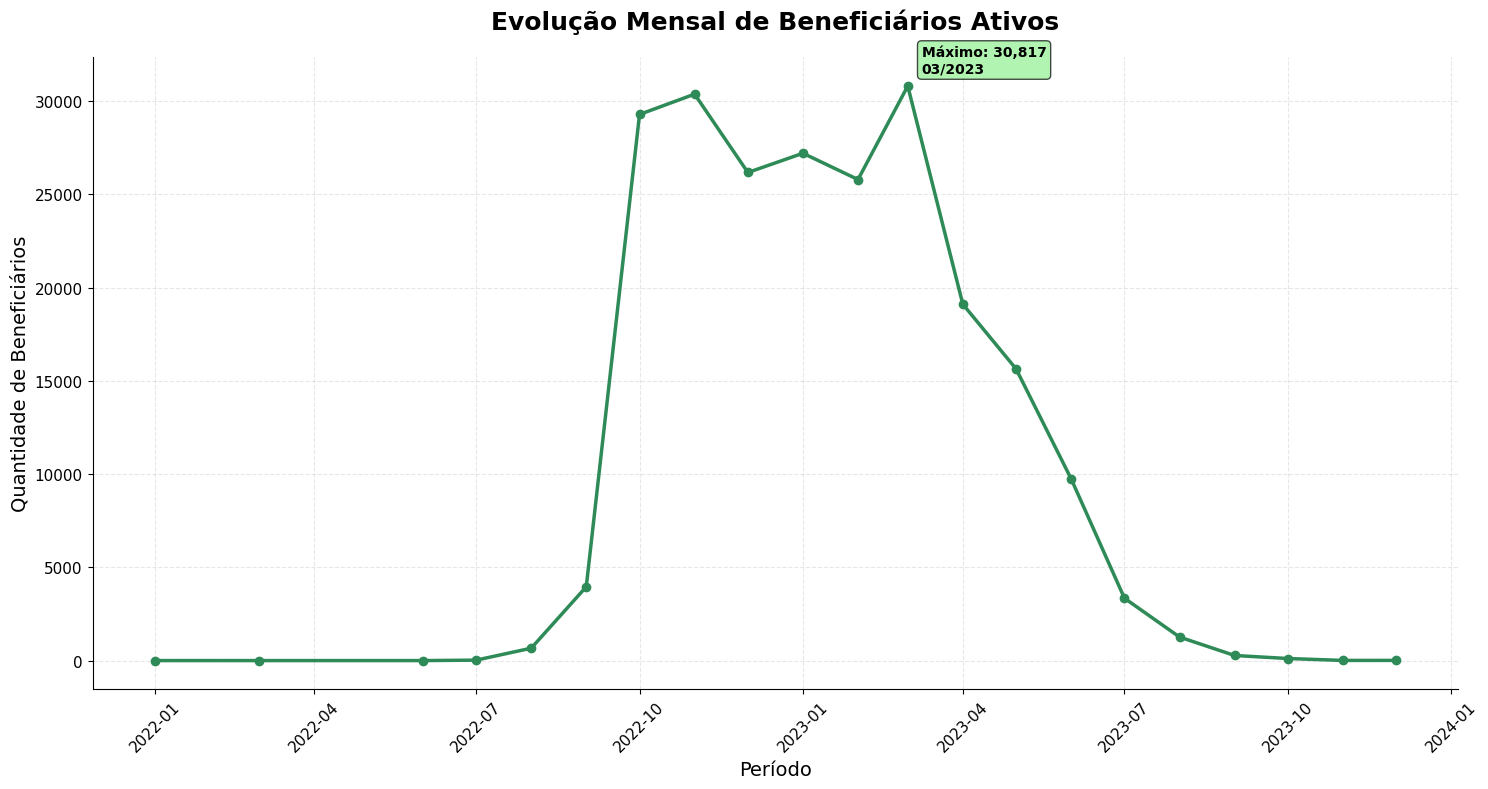


=== ESTAT√çSTICAS DA EVOLU√á√ÉO MENSAL ===
Pico m√°ximo: 30,817 benefici√°rios em March/2023
Valor m√≠nimo: 2 benefici√°rios em March/2022
M√©dia mensal: 10660 benefici√°rios
Varia√ß√£o total: 30,815 benefici√°rios
Tend√™ncia: CRESCIMENTO de 9 benefici√°rios no per√≠odo


In [55]:
# Evolu√ß√£o do n√∫mero de benefici√°rios m√™s a m√™s
print("\nGerando gr√°fico: Evolu√ß√£o de Benefici√°rios Ativos por M√™s")

# Usar os dados originais que cont√™m dt_item
df_trans_plano = dataframes['df_benef_proc_plano'].copy()

# Converter dt_item para datetime se ainda n√£o estiver
df_trans_plano['dt_item'] = pd.to_datetime(df_trans_plano['dt_item'])

# Criar coluna ano-m√™s
df_trans_plano['ano_mes'] = df_trans_plano['dt_item'].dt.to_period('M')

# Contar benefici√°rios √∫nicos por m√™s
benef_por_mes = df_trans_plano.groupby('ano_mes')['id_beneficiario'].nunique()

# Filtrar per√≠odo de interesse (2022-2024)
benef_por_mes = benef_por_mes.loc[(benef_por_mes.index >= '2022-01') & (benef_por_mes.index < '2025-01')]

print(f"Dados dispon√≠veis de {benef_por_mes.index.min()} at√© {benef_por_mes.index.max()}")

# Converter √≠ndice para datetime para melhor plotagem
benef_por_mes.index = benef_por_mes.index.to_timestamp()

# Criar o gr√°fico de linha
plt.figure(figsize=(15, 8))
plt.plot(benef_por_mes.index, benef_por_mes.values, marker='o', linewidth=2.5, markersize=6, color="#2E8B57")

# Customiza√ß√£o do gr√°fico
plt.title('Evolu√ß√£o Mensal de Benefici√°rios Ativos', fontsize=18, weight='bold', pad=20)
plt.ylabel('Quantidade de Benefici√°rios', fontsize=14)
plt.xlabel('Per√≠odo', fontsize=14)

# Formata√ß√£o do eixo X (datas)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Grid para melhor visualiza√ß√£o
plt.grid(True, alpha=0.3, linestyle='--')

# Remover bordas superiores e direitas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar anota√ß√µes nos pontos extremos
max_idx = benef_por_mes.idxmax()
min_idx = benef_por_mes.idxmin()
max_val = benef_por_mes.max()
min_val = benef_por_mes.min()

plt.annotate(f'M√°ximo: {max_val:,}\n{max_idx.strftime("%m/%Y")}', 
             xy=(max_idx, max_val), xytext=(10, 10),
             textcoords='offset points', ha='left',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Estat√≠sticas resumidas
print(f"\n=== ESTAT√çSTICAS DA EVOLU√á√ÉO MENSAL ===")
print(f"Pico m√°ximo: {max_val:,} benefici√°rios em {max_idx.strftime('%B/%Y')}")
print(f"Valor m√≠nimo: {min_val:,} benefici√°rios em {min_idx.strftime('%B/%Y')}")
print(f"M√©dia mensal: {benef_por_mes.mean():.0f} benefici√°rios")
print(f"Varia√ß√£o total: {max_val - min_val:,} benefici√°rios")

# Mostrar tend√™ncia (crescimento/decrescimento)
crescimento = benef_por_mes.iloc[-1] - benef_por_mes.iloc[0]
if crescimento > 0:
    print(f"Tend√™ncia: CRESCIMENTO de {crescimento:,} benefici√°rios no per√≠odo")
elif crescimento < 0:
    print(f"Tend√™ncia: DECRESCIMENTO de {abs(crescimento):,} benefici√°rios no per√≠odo")
else:
    print(f"Tend√™ncia: EST√ÅVEL no per√≠odo")


Gerando gr√°fico comparativo mensal detalhado: DCNT vs. N√£o DCNT


/tmp/ipykernel_27809/918440023.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)
/tmp/ipykernel_27809/918440023.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)


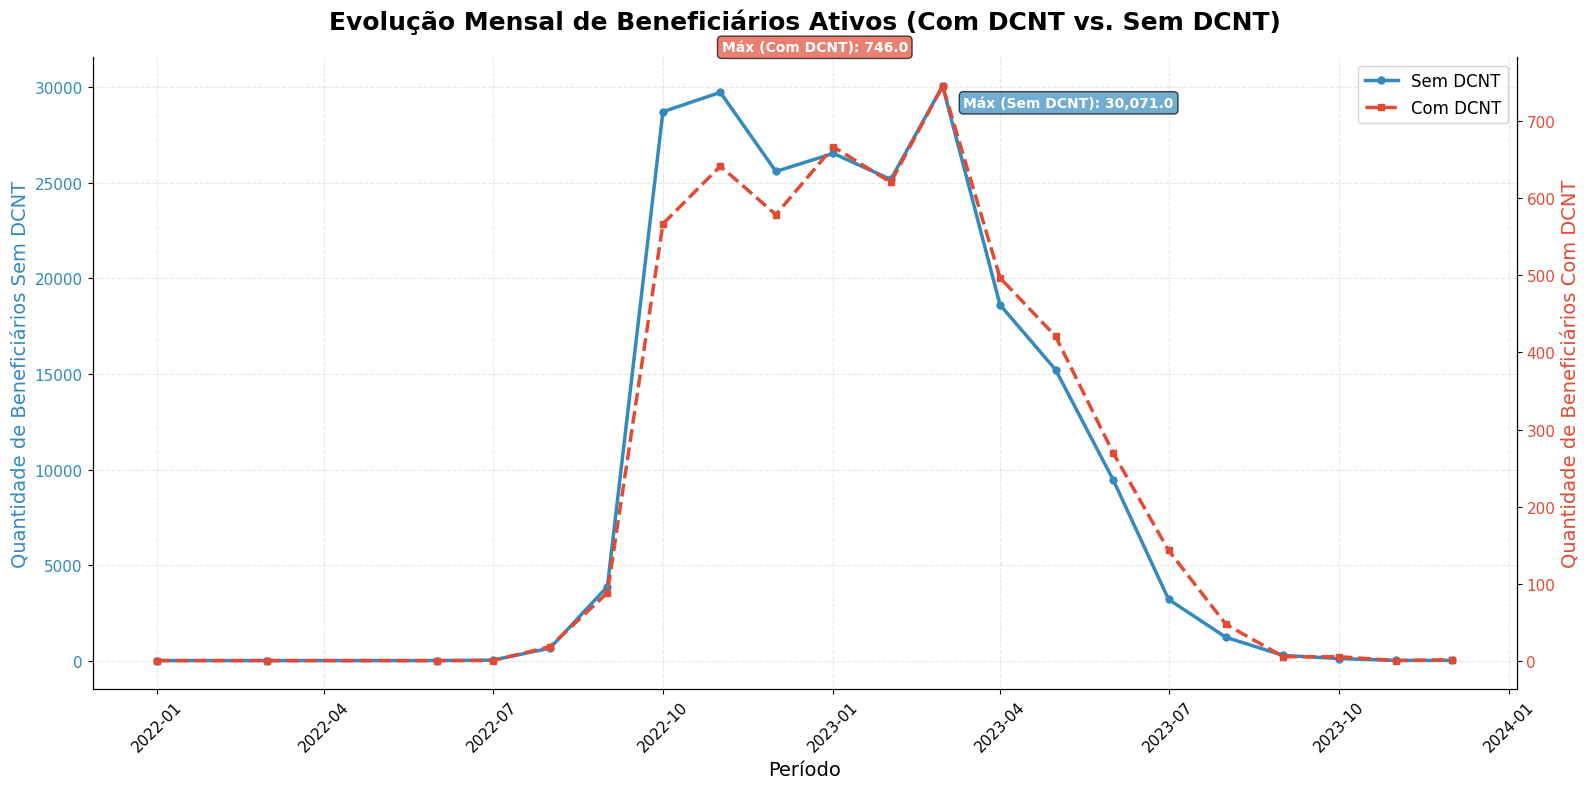


=== ESTAT√çSTICAS DO GRUPO SEM DCNT ===
Pico m√°ximo: 30,071.0 benefici√°rios em March de 2023
Valor m√≠nimo: 2.0 benefici√°rios em March de 2022
M√©dia mensal: 10407 benefici√°rios
Tend√™ncia no per√≠odo: +8.0 benefici√°rios

=== ESTAT√çSTICAS DO GRUPO COM DCNT ===
Pico m√°ximo: 746.0 benefici√°rios em March de 2023
M√©dia mensal: 253 benefici√°rios
Tend√™ncia no per√≠odo: +1.0 benefici√°rios


In [63]:
# Gr√°fico Comparativo Mensal: Com DCNT vs. Sem DCNT (no estilo solicitado)
print("\nGerando gr√°fico comparativo mensal detalhado: DCNT vs. N√£o DCNT")

# --- 1. Prepara√ß√£o dos Dados (a mesma l√≥gica anterior) ---
df_evolucao_dcnt = pd.merge(
    df_trans_plano,
    df_master[['id_beneficiario', 'possui_dcnt']],
    on='id_beneficiario',
    how='left'
)
df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)
df_evolucao_dcnt['ano_mes'] = df_evolucao_dcnt['dt_item'].dt.to_period('M')
contagem_mensal_dcnt = df_evolucao_dcnt.groupby(['ano_mes', 'possui_dcnt'])['id_beneficiario'].nunique().unstack().fillna(0)
contagem_mensal_dcnt.columns = ['Sem DCNT', 'Com DCNT']
contagem_mensal_dcnt = contagem_mensal_dcnt.loc[(contagem_mensal_dcnt.index >= '2022-01') & (contagem_mensal_dcnt.index < '2025-01')]
contagem_mensal_dcnt.index = contagem_mensal_dcnt.index.to_timestamp()

# Separar as s√©ries para facilitar o c√°lculo das estat√≠sticas
sem_dcnt_series = contagem_mensal_dcnt['Sem DCNT']
com_dcnt_series = contagem_mensal_dcnt['Com DCNT']

# --- 2. Cria√ß√£o do Gr√°fico com a Est√©tica Solicitada ---
fig, ax1 = plt.subplots(figsize=(16, 8))

# Linha 1: Benefici√°rios SEM DCNT (eixo da esquerda)
color1 = '#348ABD' # Azul
ax1.plot(sem_dcnt_series.index, sem_dcnt_series.values, marker='o', linewidth=2.5, markersize=5, color=color1, label='Sem DCNT')
ax1.set_xlabel('Per√≠odo', fontsize=14)
ax1.set_ylabel('Quantidade de Benefici√°rios Sem DCNT', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=11)
ax1.tick_params(axis='x', rotation=45, labelsize=11)

# Linha 2: Benefici√°rios COM DCNT (eixo da direita)
ax2 = ax1.twinx()
color2 = '#E24A33' # Vermelho
ax2.plot(com_dcnt_series.index, com_dcnt_series.values, marker='s', linewidth=2.5, markersize=5, linestyle='--', color=color2, label='Com DCNT')
ax2.set_ylabel('Quantidade de Benefici√°rios Com DCNT', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=11)

# --- 3. Customiza√ß√£o e Anota√ß√µes (no estilo do exemplo) ---
plt.title('Evolu√ß√£o Mensal de Benefici√°rios Ativos (Com DCNT vs. Sem DCNT)', fontsize=18, weight='bold', pad=20)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Anota√ß√µes para a linha "Sem DCNT"
max_idx1, max_val1 = sem_dcnt_series.idxmax(), sem_dcnt_series.max()
min_idx1, min_val1 = sem_dcnt_series.idxmin(), sem_dcnt_series.min()
ax1.annotate(f'M√°x (Sem DCNT): {max_val1:,}', xy=(max_idx1, max_val1), xytext=(15, -15),
             textcoords='offset points', ha='left',
             bbox=dict(boxstyle='round,pad=0.3', fc=color1, alpha=0.7),
             fontsize=10, fontweight='bold', color='white')

# Anota√ß√µes para a linha "Com DCNT"
max_idx2, max_val2 = com_dcnt_series.idxmax(), com_dcnt_series.max()
min_idx2, min_val2 = com_dcnt_series.idxmin(), com_dcnt_series.min()
ax2.annotate(f'M√°x (Com DCNT): {max_val2:,}', xy=(max_idx2, max_val2), xytext=(-25, 25),
             textcoords='offset points', ha='right',
             bbox=dict(boxstyle='round,pad=0.3', fc=color2, alpha=0.7),
             fontsize=10, fontweight='bold', color='white')
# Legenda unificada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=12)

plt.tight_layout()
plt.show()

# --- 4. Estat√≠sticas Resumidas para Ambos os Grupos ---
print("\n" + "="*40)
print("=== ESTAT√çSTICAS DO GRUPO SEM DCNT ===")
print("="*40)
print(f"Pico m√°ximo: {sem_dcnt_series.max():,} benefici√°rios em {sem_dcnt_series.idxmax().strftime('%B de %Y')}")
print(f"Valor m√≠nimo: {sem_dcnt_series.min():,} benefici√°rios em {sem_dcnt_series.idxmin().strftime('%B de %Y')}")
print(f"M√©dia mensal: {sem_dcnt_series.mean():.0f} benefici√°rios")
crescimento1 = sem_dcnt_series.iloc[-1] - sem_dcnt_series.iloc[0]
print(f"Tend√™ncia no per√≠odo: {crescimento1:+,} benefici√°rios") # O sinal + mostra crescimento

print("\n" + "="*40)
print("=== ESTAT√çSTICAS DO GRUPO COM DCNT ===")
print("="*40)
print(f"Pico m√°ximo: {com_dcnt_series.max():,} benefici√°rios em {com_dcnt_series.idxmax().strftime('%B de %Y')}")
print(f"M√©dia mensal: {com_dcnt_series.mean():.0f} benefici√°rios")
crescimento2 = com_dcnt_series.iloc[-1] - com_dcnt_series.iloc[0]
print(f"Tend√™ncia no per√≠odo: {crescimento2:+,} benefici√°rios")

=== AN√ÅLISE DE TEMPO DE INTERNA√á√ÉO PARA PACIENTES COM DCNT ===

1. Identificando pacientes com DCNT...
‚úì Encontrados 6996 pacientes √∫nicos com diagn√≥sticos de DCNT
‚úì Marcados 3963 benefici√°rios como portadores de DCNT

2. Analisando interna√ß√µes...
‚úì Analisando 1844 interna√ß√µes de pacientes com DCNT

=== RESULTADOS ===
Tempo m√©dio de interna√ß√£o (DCNT): 1.69 dias
Tempo mediano de interna√ß√£o (DCNT): 1.00 dias
Interna√ß√£o mais longa: 92 dias
Interna√ß√£o mais curta: 0 dias


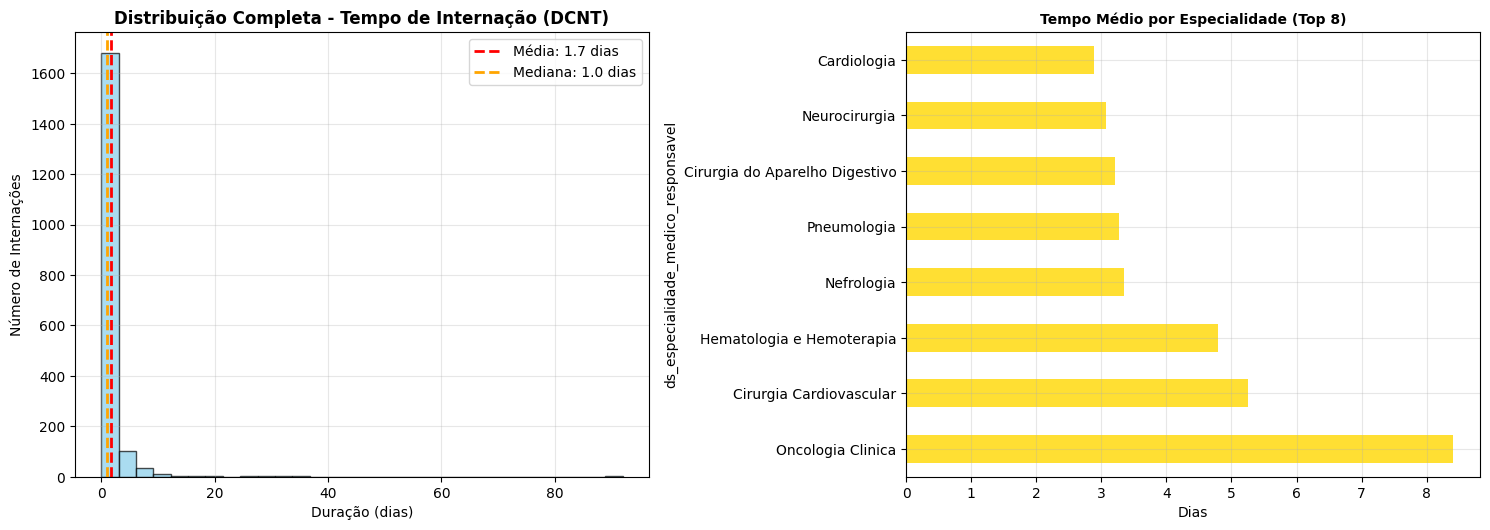


=== COMPARA√á√ÉO ===
Tempo m√©dio geral (todos pacientes): 1.80 dias
Diferen√ßa DCNT vs Geral: -0.11 dias

Perfil das interna√ß√µes (DCNT):
- Interna√ß√µes curtas (‚â§3 dias): 91.1%
- Interna√ß√µes longas (>10 dias): 1.2%


In [34]:
# Tempo m√©dio de atendimento de benefici√°rios j√° diagnosticados com DCNT
print("=== AN√ÅLISE DE TEMPO DE INTERNA√á√ÉO PARA PACIENTES COM DCNT ===")

# PASSO 1: Identificar pacientes com DCNT
print("\n1. Identificando pacientes com DCNT...")

# Obter pacientes que t√™m diagn√≥sticos relacionados √† linha de cuidado (DCNT)
pacientes_linha_cuidado = set(dataframes['df_atend_hgu_cid']['nr_atendimento'].unique())

# Obter atendimentos que s√£o da linha de cuidado
atendimentos_dcnt = dataframes['df_atend_hgu_cid']['nr_atendimento'].unique()

# Obter id_paciente dos atendimentos com DCNT
pacientes_com_dcnt = dataframes['df_atend_hgu'][
    dataframes['df_atend_hgu']['nr_atendimento'].isin(atendimentos_dcnt)
]['id_paciente'].unique()

print(f"‚úì Encontrados {len(pacientes_com_dcnt)} pacientes √∫nicos com diagn√≥sticos de DCNT")

# PASSO 2: Criar coluna 'possui_dcnt' no df_master
df_master['possui_dcnt'] = df_master['id_paciente'].isin(pacientes_com_dcnt)

print(f"‚úì Marcados {df_master['possui_dcnt'].sum()} benefici√°rios como portadores de DCNT")

# PASSO 3: Analisar interna√ß√µes de pacientes com DCNT
print("\n2. Analisando interna√ß√µes...")

# Fazer merge entre atendimentos hospitalares e informa√ß√£o de DCNT
internacoes_dcnt = pd.merge(
    dataframes['df_atend_hgu'], 
    df_master[['id_paciente', 'possui_dcnt']], 
    on='id_paciente', 
    how='inner'
)

# Filtrar apenas pacientes com DCNT e interna√ß√µes
internacoes_dcnt = internacoes_dcnt[
    (internacoes_dcnt['possui_dcnt'] == True) & 
    (internacoes_dcnt['ds_tipo_atendimento'] == 'Internado')
].copy()

# Calcular dura√ß√£o da interna√ß√£o
internacoes_dcnt['duracao_dias'] = (internacoes_dcnt['dt_alta'] - internacoes_dcnt['dt_entrada']).dt.days

# Filtrar valores v√°lidos (0 a 365 dias)
internacoes_dcnt = internacoes_dcnt[
    internacoes_dcnt['duracao_dias'].between(0, 365)
]

print(f"‚úì Analisando {len(internacoes_dcnt)} interna√ß√µes de pacientes com DCNT")

# PASSO 4: Calcular estat√≠sticas
if len(internacoes_dcnt) > 0:
    tempo_medio_internacao = internacoes_dcnt['duracao_dias'].mean()
    tempo_mediano = internacoes_dcnt['duracao_dias'].median()
    tempo_max = internacoes_dcnt['duracao_dias'].max()
    tempo_min = internacoes_dcnt['duracao_dias'].min()
    
    print(f"\n=== RESULTADOS ===")
    print(f"Tempo m√©dio de interna√ß√£o (DCNT): {tempo_medio_internacao:.2f} dias")
    print(f"Tempo mediano de interna√ß√£o (DCNT): {tempo_mediano:.2f} dias")
    print(f"Interna√ß√£o mais longa: {tempo_max} dias")
    print(f"Interna√ß√£o mais curta: {tempo_min} dias")
    
    # PASSO 5: Visualiza√ß√£o
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Histograma geral
    plt.subplot(2, 2, 1)
    plt.hist(internacoes_dcnt['duracao_dias'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(tempo_medio_internacao, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {tempo_medio_internacao:.1f} dias')
    plt.axvline(tempo_mediano, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {tempo_mediano:.1f} dias')
    plt.title('Distribui√ß√£o Completa - Tempo de Interna√ß√£o (DCNT)', fontsize=12, weight='bold')
    plt.xlabel('Dura√ß√£o (dias)')
    plt.ylabel('N√∫mero de Interna√ß√µes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    

    # Subplot 2: Estat√≠sticas por especialidade
    plt.subplot(2, 2, 2)
    if 'ds_especialidade_medico_responsavel' in internacoes_dcnt.columns:
        tempo_por_especialidade = internacoes_dcnt.groupby('ds_especialidade_medico_responsavel')['duracao_dias'].mean().sort_values(ascending=False).head(8)
        tempo_por_especialidade.plot(kind='barh', color='gold', alpha=0.8)
        plt.title('Tempo M√©dio por Especialidade (Top 8)', fontsize=10, weight='bold')
        plt.xlabel('Dias')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compara√ß√£o com popula√ß√£o geral
    print(f"\n=== COMPARA√á√ÉO ===")
    # Calcular tempo m√©dio para todos os pacientes
    todas_internacoes = dataframes['df_atend_hgu'][
        dataframes['df_atend_hgu']['ds_tipo_atendimento'] == 'Internado'
    ].copy()
    todas_internacoes['duracao_dias'] = (todas_internacoes['dt_alta'] - todas_internacoes['dt_entrada']).dt.days
    todas_internacoes = todas_internacoes[todas_internacoes['duracao_dias'].between(0, 365)]
    
    tempo_medio_geral = todas_internacoes['duracao_dias'].mean()
    print(f"Tempo m√©dio geral (todos pacientes): {tempo_medio_geral:.2f} dias")
    print(f"Diferen√ßa DCNT vs Geral: {tempo_medio_internacao - tempo_medio_geral:+.2f} dias")
    
    # Percentual de interna√ß√µes curtas vs longas
    internacoes_curtas_pct = (len(internacoes_dcnt[internacoes_dcnt['duracao_dias'] <= 3]) / len(internacoes_dcnt)) * 100
    internacoes_longas_pct = (len(internacoes_dcnt[internacoes_dcnt['duracao_dias'] > 10]) / len(internacoes_dcnt)) * 100
    
    print(f"\nPerfil das interna√ß√µes (DCNT):")
    print(f"- Interna√ß√µes curtas (‚â§3 dias): {internacoes_curtas_pct:.1f}%")
    print(f"- Interna√ß√µes longas (>10 dias): {internacoes_longas_pct:.1f}%")

else:
    print("‚ùå Nenhuma interna√ß√£o encontrada para pacientes com DCNT")


Analisando as caracter√≠sticas percentuais dos pacientes com DCNT (Gr√°ficos Verticais)


/tmp/ipykernel_27809/3012336770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perfil_counts.index.astype(str), y=perfil_counts.values, ax=axes[0], palette='viridis')
/tmp/ipykernel_27809/3012336770.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, ax=axes[1], palette='magma')


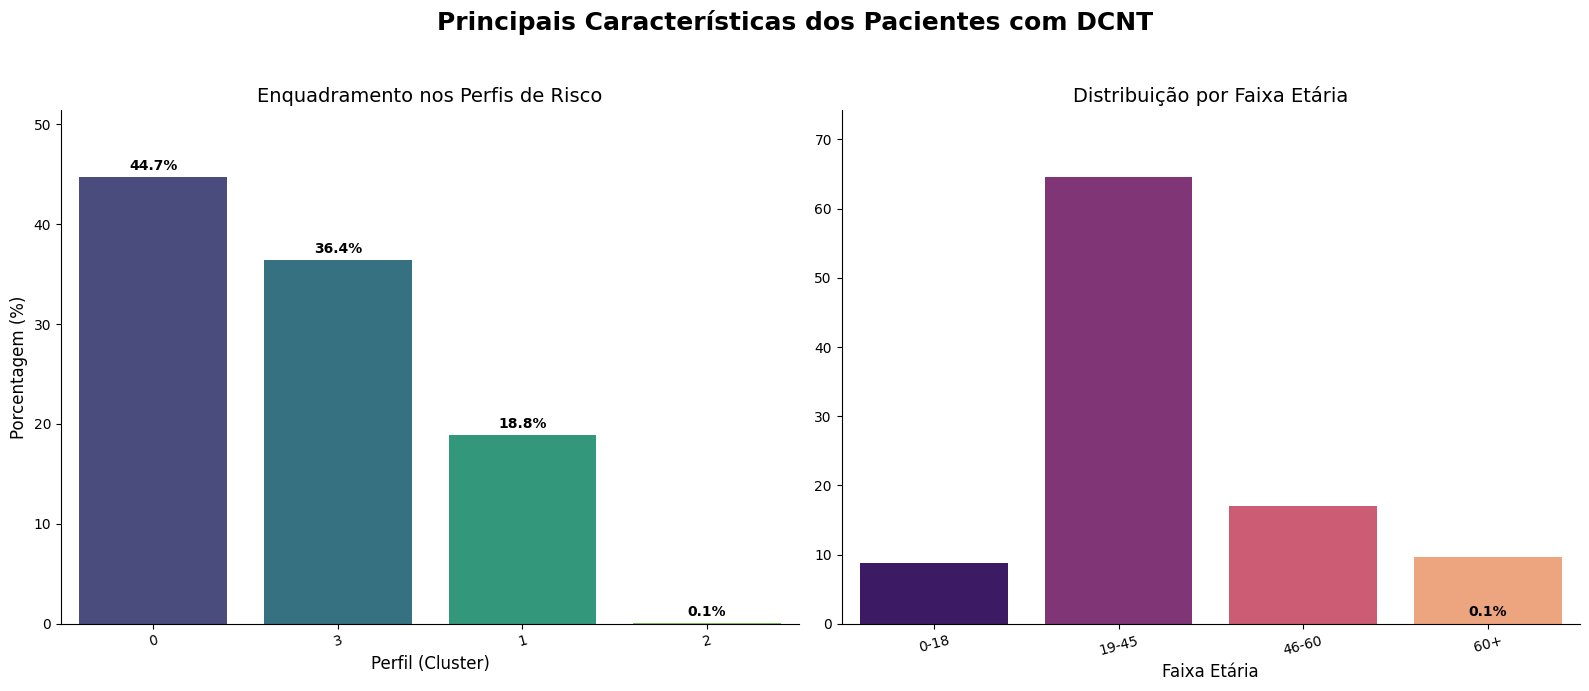

In [35]:
# Apresentar, em porcentagem, as principais caracter√≠sticas por pacientes com DCNT (VERTICAL COM LABELS CORRIGIDOS)
print("\nAnalisando as caracter√≠sticas percentuais dos pacientes com DCNT (Gr√°ficos Verticais)")
df_dcnt = df_master[df_master['possui_dcnt'] == True].copy()

if not df_dcnt.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Principais Caracter√≠sticas dos Pacientes com DCNT', fontsize=18, weight='bold')

    perfil_counts = df_dcnt['perfil_risco'].value_counts(normalize=True).mul(100)
    sns.barplot(x=perfil_counts.index.astype(str), y=perfil_counts.values, ax=axes[0], palette='viridis')
    
    axes[0].set_title('Enquadramento nos Perfis de Risco', fontsize=14)
    axes[0].set_xlabel('Perfil (Cluster)', fontsize=12)
    axes[0].set_ylabel('Porcentagem (%)', fontsize=12)
    axes[0].set_ylim(0, perfil_counts.max() * 1.15) # Espa√ßo extra para o r√≥tulo
    
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, weight='bold')

    bins = [0, 18, 45, 60, 120]; labels = ['0-18', '19-45', '46-60', '60+']
    df_dcnt['faixa_etaria'] = pd.cut(df_dcnt['idade_calculada'], bins=bins, labels=labels)
    faixa_etaria_counts = df_dcnt['faixa_etaria'].value_counts(normalize=True).mul(100)
    
    sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, ax=axes[1], palette='magma')
    
    axes[1].set_title('Distribui√ß√£o por Faixa Et√°ria', fontsize=14)
    axes[1].set_xlabel('Faixa Et√°ria', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].set_ylim(0, faixa_etaria_counts.max() * 1.15) # Espa√ßo extra para o r√≥tulo
    
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, weight='bold')

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', rotation=15)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("Nenhum paciente com DCNT identificado para an√°lise.")

## Extrair mais 3 principais informa√ß√µes da base e elaborem os gr√°ficos para visualiz√°-las. Cada c√≥digo em uma c√©lula separada

=== AN√ÅLISE DE CONCENTRA√á√ÉO DE CUSTOS ===
Total de benefici√°rios com custos: 33,420
Custo total: R$ 32,017,778.44
Top 10% dos benefici√°rios = 54.2% dos custos
Top 20% dos benefici√°rios = 68.7% dos custos
Top 30% dos benefici√°rios = 78.1% dos custos


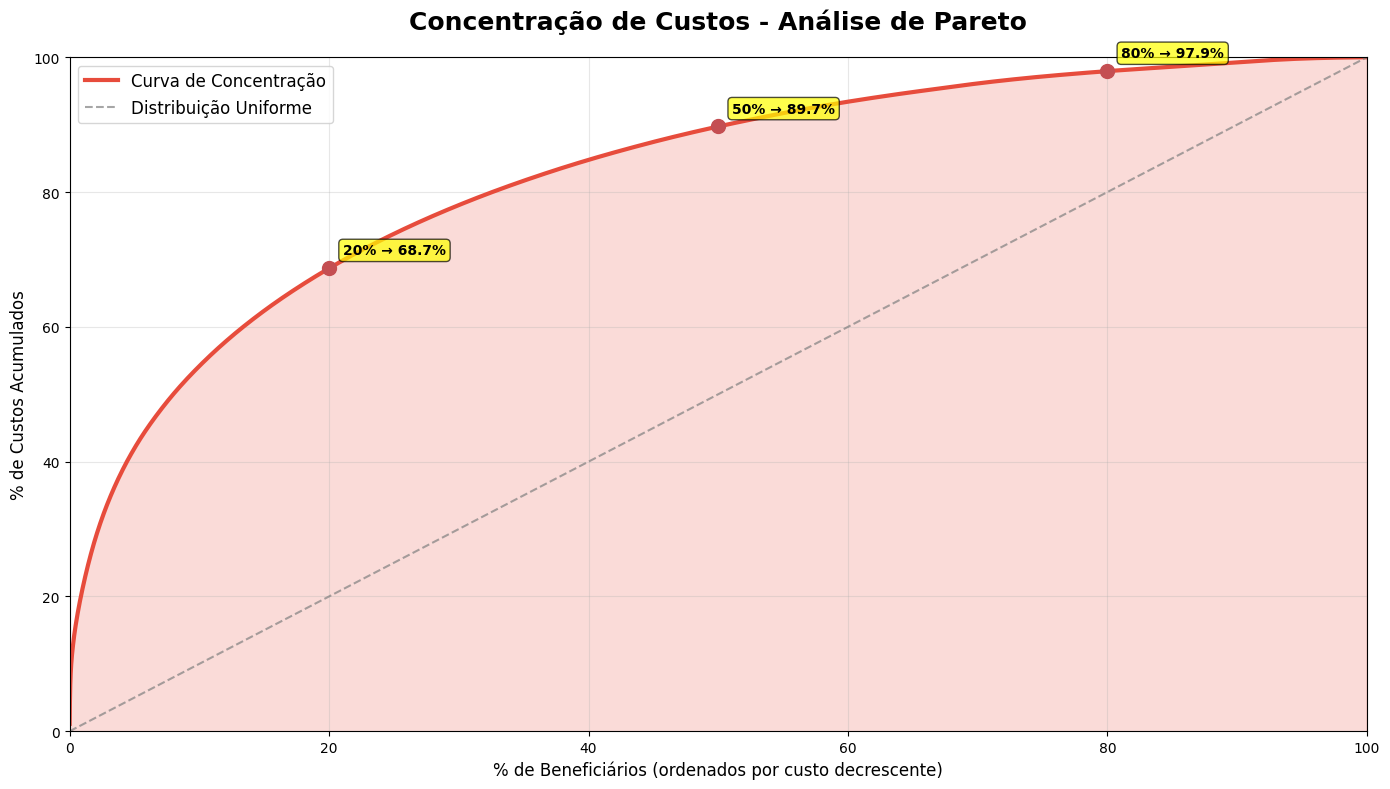


=== INSIGHTS PRINCIPAIS ===
üìä Top 20% dos benefici√°rios consomem 68.7% dos recursos
üí∞ Custo m√©dio do Top 20%: R$ 3,290.24
üí∞ Custo m√©dio geral: R$ 958.04

=== AN√ÅLISE DE OUTLIERS ===
üî• Top 1% dos benefici√°rios consomem 21.2% dos recursos
üí∏ Custo m√©dio do Top 1%: R$ 20,343.04
üìà Maior custo individual: R$ 350,069.58


In [36]:
# An√°lise 1: Concentra√ß√£o de Custos - Princ√≠pio de Pareto (80/20)
print("=== AN√ÅLISE DE CONCENTRA√á√ÉO DE CUSTOS ===")

# Filtrar apenas benefici√°rios com custo > 0
df_com_custo = df_master[df_master['total_custo_plano'] > 0].copy()

# Ordenar por custo decrescente
df_com_custo = df_com_custo.sort_values('total_custo_plano', ascending=False)

# Calcular percentuais acumulados
df_com_custo['custo_acumulado'] = df_com_custo['total_custo_plano'].cumsum()

# CORRE√á√ÉO: Converter range para list ou usar numpy.arange
import numpy as np
df_com_custo['pct_beneficiarios'] = np.arange(1, len(df_com_custo) + 1) / len(df_com_custo) * 100
df_com_custo['pct_custo_acumulado'] = df_com_custo['custo_acumulado'] / df_com_custo['total_custo_plano'].sum() * 100

# Encontrar pontos chave (10%, 20%, etc.)
pontos_chave = [10, 20, 30]
custo_total = df_com_custo['total_custo_plano'].sum()

print(f"Total de benefici√°rios com custos: {len(df_com_custo):,}")
print(f"Custo total: R$ {custo_total:,.2f}")

for pct in pontos_chave:
    idx = int(len(df_com_custo) * pct / 100)
    custo_acum = df_com_custo.iloc[:idx]['total_custo_plano'].sum()
    pct_custo = (custo_acum / custo_total) * 100
    print(f"Top {pct}% dos benefici√°rios = {pct_custo:.1f}% dos custos")

# Criar o gr√°fico
plt.figure(figsize=(14, 8))

# Gr√°fico principal - Curva de Pareto
plt.plot(df_com_custo['pct_beneficiarios'], df_com_custo['pct_custo_acumulado'], 
         linewidth=3, color='#E74C3C', label='Curva de Concentra√ß√£o')

# Linha de refer√™ncia (distribui√ß√£o uniforme)
plt.plot([0, 100], [0, 100], linestyle='--', color='gray', alpha=0.7, label='Distribui√ß√£o Uniforme')

# Destacar pontos importantes
for pct in [20, 50, 80]:
    idx = int(len(df_com_custo) * pct / 100)
    if idx < len(df_com_custo):  # Verifica√ß√£o de seguran√ßa
        y_val = df_com_custo.iloc[idx]['pct_custo_acumulado']
        plt.plot(pct, y_val, 'o', markersize=10, color='#C44E52')
        plt.annotate(f'{pct}% ‚Üí {y_val:.1f}%', 
                    (pct, y_val), xytext=(10, 10),
                    textcoords='offset points', 
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontsize=10, fontweight='bold')

plt.title('Concentra√ß√£o de Custos - An√°lise de Pareto', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('% de Benefici√°rios (ordenados por custo decrescente)', fontsize=12)
plt.ylabel('% de Custos Acumulados', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 100)
plt.ylim(0, 100)

# Adicionar √°rea sombreada para destacar concentra√ß√£o
plt.fill_between(df_com_custo['pct_beneficiarios'], 
                df_com_custo['pct_custo_acumulado'], 
                alpha=0.2, color='#E74C3C')

plt.tight_layout()
plt.show()

# Insights espec√≠ficos
top_20_idx = int(len(df_com_custo) * 0.2)
top_20_pct_custo = df_com_custo.iloc[:top_20_idx]['total_custo_plano'].sum()
pct_top_20 = (top_20_pct_custo / custo_total) * 100

print(f"\n=== INSIGHTS PRINCIPAIS ===")
print(f"üìä Top 20% dos benefici√°rios consomem {pct_top_20:.1f}% dos recursos")
print(f"üí∞ Custo m√©dio do Top 20%: R$ {df_com_custo.iloc[:top_20_idx]['total_custo_plano'].mean():,.2f}")
print(f"üí∞ Custo m√©dio geral: R$ {df_com_custo['total_custo_plano'].mean():,.2f}")

# An√°lise adicional de outliers
print(f"\n=== AN√ÅLISE DE OUTLIERS ===")
top_1_pct = df_com_custo.iloc[:int(len(df_com_custo)*0.01)]
if len(top_1_pct) > 0:
    custo_top_1 = top_1_pct['total_custo_plano'].sum()
    pct_top_1 = (custo_top_1 / custo_total) * 100
    print(f"üî• Top 1% dos benefici√°rios consomem {pct_top_1:.1f}% dos recursos")
    print(f"üí∏ Custo m√©dio do Top 1%: R$ {top_1_pct['total_custo_plano'].mean():,.2f}")
    print(f"üìà Maior custo individual: R$ {df_com_custo['total_custo_plano'].max():,.2f}")

=== AN√ÅLISE DE UTILIZA√á√ÉO POR ESPECIALIDADE M√âDICA ===
Total de atendimentos analisados: 395,717
Especialidades com maior volume:


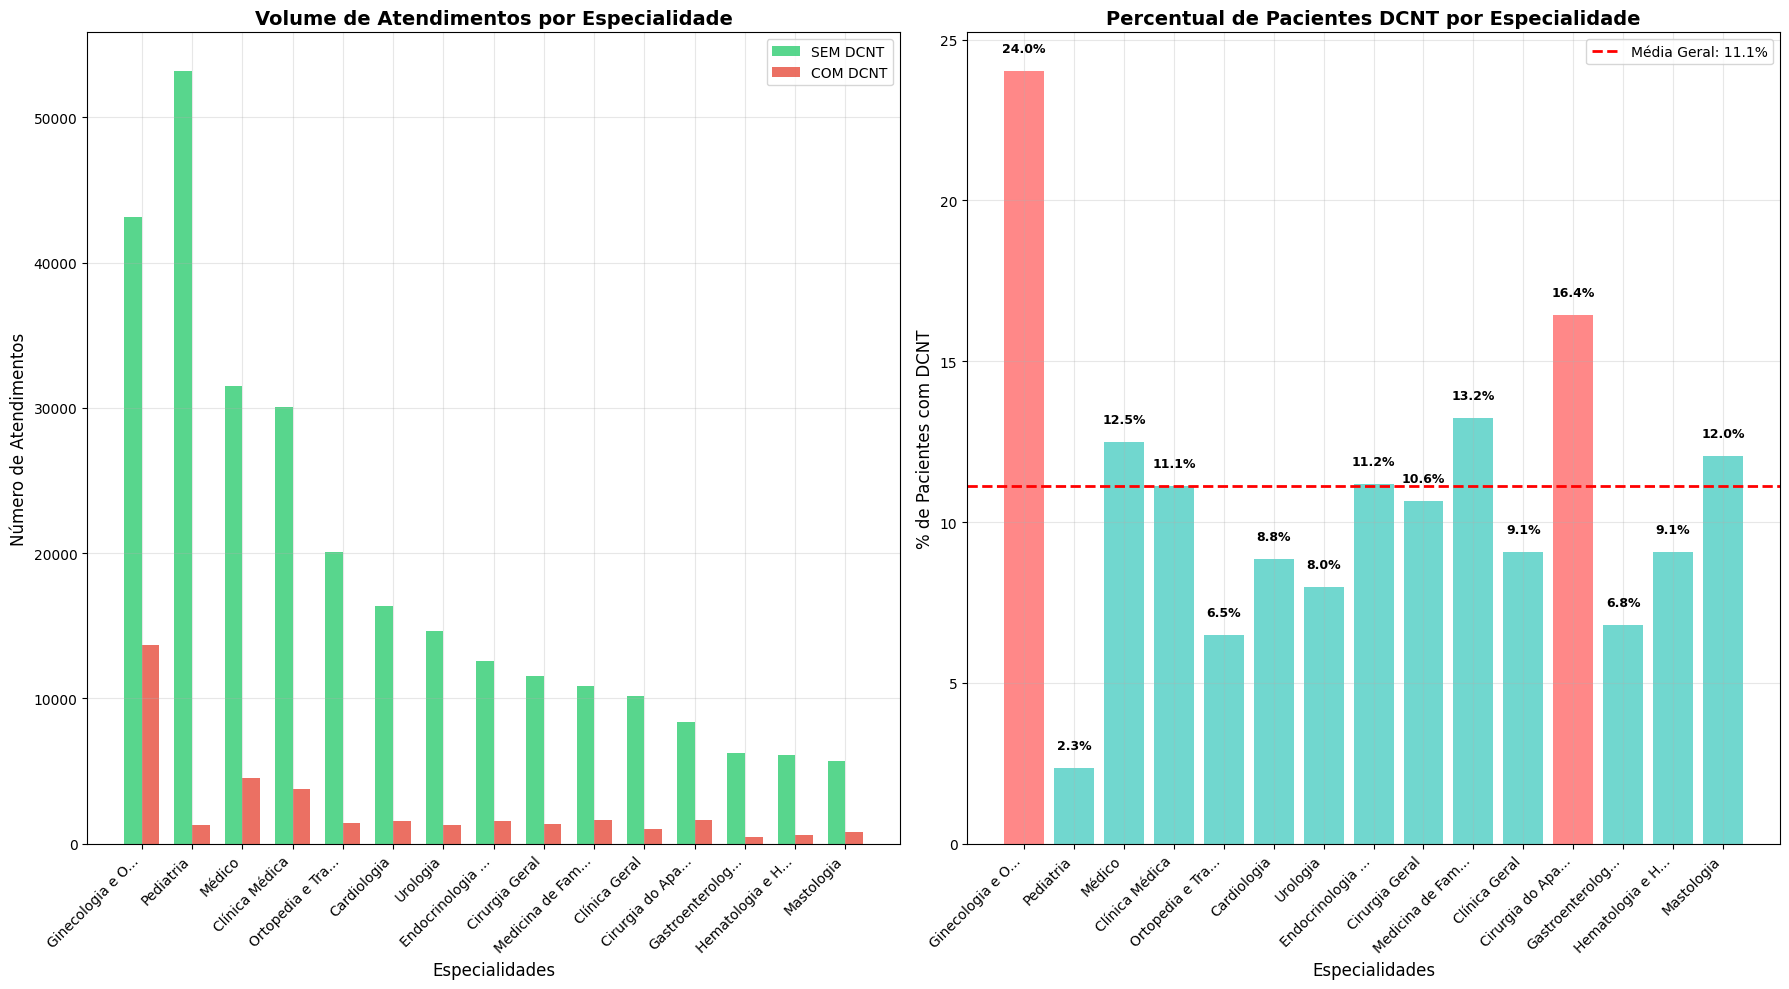


=== ESPECIALIDADES COM MAIOR CONCENTRA√á√ÉO DE DCNT ===
1. Ginecologia e Obstetr√≠cia: 24.0% DCNT (13646.0 de 56794.0 atendimentos)
2. Cirurgia do Aparelho Digestivo: 16.4% DCNT (1642.0 de 9990.0 atendimentos)
3. Medicina de Fam√≠lia e Comunidade: 13.2% DCNT (1656.0 de 12503.0 atendimentos)
4. M√©dico: 12.5% DCNT (4499.0 de 36012.0 atendimentos)
5. Mastologia: 12.0% DCNT (781.0 de 6484.0 atendimentos)

=== ESPECIALIDADES COM MAIOR VOLUME TOTAL ===
1. Ginecologia e Obstetr√≠cia: 56,794.0 atendimentos (24.0% DCNT)
2. Pediatria: 54,463.0 atendimentos (2.3% DCNT)
3. M√©dico: 36,012.0 atendimentos (12.5% DCNT)
4. Cl√≠nica M√©dica: 33,823.0 atendimentos (11.1% DCNT)
5. Ortopedia e Traumatologia: 21,481.0 atendimentos (6.5% DCNT)


In [37]:
# An√°lise 2: Utiliza√ß√£o por Especialidade M√©dica - DCNT vs N√£o-DCNT
print("=== AN√ÅLISE DE UTILIZA√á√ÉO POR ESPECIALIDADE M√âDICA ===")

# Usar dados de atendimentos hospitalares com especialidades
df_atend_especialidade = dataframes['df_atend_hgu'][
    dataframes['df_atend_hgu']['ds_especialidade_medico_responsavel'].notna()
].copy()

# Fazer merge com informa√ß√µes de DCNT
df_atend_especialidade = pd.merge(
    df_atend_especialidade,
    df_master[['id_paciente', 'possui_dcnt']],
    on='id_paciente',
    how='inner'
)

# Agrupar por especialidade e status DCNT
especialidade_dcnt = df_atend_especialidade.groupby(['ds_especialidade_medico_responsavel', 'possui_dcnt']).size().unstack(fill_value=0)
especialidade_dcnt.columns = ['SEM DCNT', 'COM DCNT']

# Calcular totais e percentuais
especialidade_dcnt['TOTAL'] = especialidade_dcnt['SEM DCNT'] + especialidade_dcnt['COM DCNT']
especialidade_dcnt['PCT_DCNT'] = (especialidade_dcnt['COM DCNT'] / especialidade_dcnt['TOTAL']) * 100

# Filtrar apenas especialidades com volume significativo (top 15)
top_especialidades = especialidade_dcnt.nlargest(15, 'TOTAL')

print(f"Total de atendimentos analisados: {df_atend_especialidade.shape[0]:,}")
print(f"Especialidades com maior volume:")

# Criar gr√°fico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Gr√°fico 1: Volume por especialidade
x_pos = range(len(top_especialidades))
width = 0.35

ax1.bar([p - width/2 for p in x_pos], top_especialidades['SEM DCNT'], 
        width, label='SEM DCNT', color='#2ECC71', alpha=0.8)
ax1.bar([p + width/2 for p in x_pos], top_especialidades['COM DCNT'], 
        width, label='COM DCNT', color='#E74C3C', alpha=0.8)

ax1.set_title('Volume de Atendimentos por Especialidade', fontsize=14, fontweight='bold')
ax1.set_xlabel('Especialidades', fontsize=12)
ax1.set_ylabel('N√∫mero de Atendimentos', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([esp[:15] + '...' if len(esp) > 15 else esp 
                     for esp in top_especialidades.index], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gr√°fico 2: Percentual de DCNT por especialidade
cores_barras = ['#FF6B6B' if pct > 15 else '#4ECDC4' for pct in top_especialidades['PCT_DCNT']]

bars = ax2.bar(x_pos, top_especialidades['PCT_DCNT'], color=cores_barras, alpha=0.8)
ax2.set_title('Percentual de Pacientes DCNT por Especialidade', fontsize=14, fontweight='bold')
ax2.set_xlabel('Especialidades', fontsize=12)
ax2.set_ylabel('% de Pacientes com DCNT', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([esp[:15] + '...' if len(esp) > 15 else esp 
                     for esp in top_especialidades.index], rotation=45, ha='right')

# Adicionar linha de refer√™ncia (m√©dia geral)
media_dcnt = (df_atend_especialidade['possui_dcnt'].sum() / len(df_atend_especialidade)) * 100
ax2.axhline(media_dcnt, color='red', linestyle='--', linewidth=2, 
           label=f'M√©dia Geral: {media_dcnt:.1f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras do gr√°fico 2
for bar, valor in zip(bars, top_especialidades['PCT_DCNT']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{valor:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Insights detalhados
print(f"\n=== ESPECIALIDADES COM MAIOR CONCENTRA√á√ÉO DE DCNT ===")
top_dcnt_especialidades = top_especialidades.nlargest(5, 'PCT_DCNT')
for idx, (esp, row) in enumerate(top_dcnt_especialidades.iterrows(), 1):
    print(f"{idx}. {esp}: {row['PCT_DCNT']:.1f}% DCNT ({row['COM DCNT']} de {row['TOTAL']} atendimentos)")

print(f"\n=== ESPECIALIDADES COM MAIOR VOLUME TOTAL ===")
top_volume_especialidades = top_especialidades.nlargest(5, 'TOTAL')
for idx, (esp, row) in enumerate(top_volume_especialidades.iterrows(), 1):
    print(f"{idx}. {esp}: {row['TOTAL']:,} atendimentos ({row['PCT_DCNT']:.1f}% DCNT)")

Gerando visualiza√ß√£o final com amostragem estratificada para garantir a visualiza√ß√£o de todos os custos...
Amostra criada com 5648 pontos (100% dos perfis pequenos e 5.0% dos perfis grandes).


/tmp/ipykernel_27809/2043049362.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grandes_amostra = df_grandes.groupby(coluna_perfil, group_keys=False).apply(lambda x: x.sample(frac=frac_grandes, random_state=42))


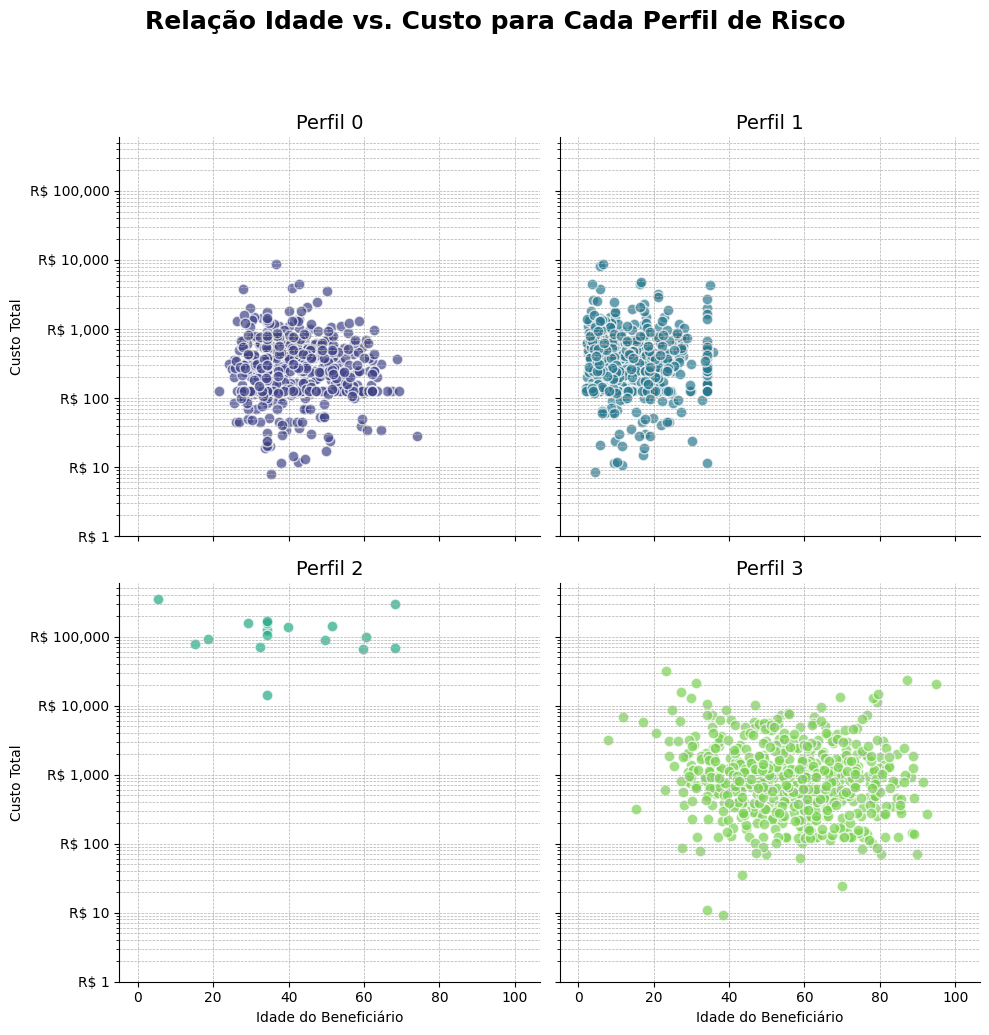

In [42]:
# Gr√°fico Extra 3 Final: Rela√ß√£o Idade vs. Custo (com Amostragem Estratificada)
print("Gerando visualiza√ß√£o final com amostragem estratificada para garantir a visualiza√ß√£o de todos os custos...")

import matplotlib.ticker as mticker

# =========================================================================
# === L√ìGICA DE AMOSTRAGEM ESTRATIFICADA INTELIGENTE ===
# =========================================================================
# Fun√ß√£o para criar a amostra inteligente
def criar_amostra_inteligente(df, coluna_perfil='perfil_risco', frac_grandes=0.05):
    # Identifica os grupos pequenos (ex: menos de 100 membros)
    contagem_perfis = df[coluna_perfil].value_counts()
    perfis_pequenos = contagem_perfis[contagem_perfis < 100].index
    
    # Pega 100% dos membros dos grupos pequenos
    df_pequenos_completo = df[df[coluna_perfil].isin(perfis_pequenos)]
    
    # Pega uma fra√ß√£o dos membros dos grupos grandes
    perfis_grandes = contagem_perfis[contagem_perfis >= 100].index
    df_grandes = df[df[coluna_perfil].isin(perfis_grandes)]
    df_grandes_amostra = df_grandes.groupby(coluna_perfil, group_keys=False).apply(lambda x: x.sample(frac=frac_grandes, random_state=42))
    
    # Combina as duas partes em uma amostra final
    df_amostra_final = pd.concat([df_pequenos_completo, df_grandes_amostra], ignore_index=True)
    print(f"Amostra criada com {len(df_amostra_final)} pontos (100% dos perfis pequenos e {frac_grandes*100}% dos perfis grandes).")
    return df_amostra_final

# Criar a amostra usando a fun√ß√£o
df_intel_sample = criar_amostra_inteligente(df_master)

# =========================================================================
# === PLOTAGEM USANDO A NOVA AMOSTRA ===
# =========================================================================
g = sns.lmplot(
    data=df_intel_sample, # Usando a nova amostra inteligente
    x='idade_calculada',
    y='total_custo_plano',
    hue='perfil_risco',
    col='perfil_risco',
    col_wrap=2,
    palette='viridis',
    fit_reg=False,
    scatter_kws={'alpha':0.7, 'edgecolor':'w', 's': 60}
)

# Melhorias de Visualiza√ß√£o
g.fig.suptitle('Rela√ß√£o Idade vs. Custo para Cada Perfil de Risco', fontsize=18, weight='bold', y=1.03)
g.set_axis_labels("Idade do Benefici√°rio", "Custo Total")

# Aplicar escala de log e formata√ß√£o do eixo Y em Reais (R$)
for ax, title in zip(g.axes.flatten(), g.col_names):
    # Reordenar os t√≠tulos para corresponder aos plots
    perfil_title = f'Perfil {title}'
    ax.set_title(perfil_title, fontsize=14)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    formatter = mticker.FuncFormatter(lambda x, p: f'R$ {int(x):,}')
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()